In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-house-price-prediction/MagicBricks.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("/kaggle/input/delhi-house-price-prediction/MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [5]:
df.shape

(1259, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [7]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [8]:
df.Bathroom.unique()

array([ 2.,  3.,  4.,  1., nan,  5.,  6.,  7.])

In [9]:
df.Furnishing.unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [10]:
df.Parking.unique()

array([  1.,   5.,   2.,  nan,   4.,   9.,   3.,  39.,  10., 114.])

In [11]:
df.Type.unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [12]:
df.Per_Sqft.unique()

array([    nan,   6667.,   6154.,   6364.,   8750.,   9722.,  14444.,
        22000.,   2235.,   3800.,   4247.,   3524.,  26666.,  15972.,
       183333.,  20000.,  15556.,  16176.,   9259.,  18507.,   7000.,
        72000.,  43000.,   4444.,   3300.,  40000.,   5185.,   4000.,
         3567.,   1259.,   2500.,   5255.,   6528.,   6875.,   5714.,
         7449.,   8125.,   7931.,   5789.,   6471.,   8438.,   6508.,
         8000.,   6000.,   6250.,   6333.,   6714.,  28797.,  23840.,
         4600.,   4620.,   5000.,   6111.,  25512.,  22222.,  24718.,
        30556.,  18750., 120000.,  15459.,  23529.,  16667.,  11111.,
        21409.,  95000.,  15363.,  19259.,  20833.,  20930.,   6526.,
         3901.,   6347.,  41304.,   8701.,   5556.,  85715.,   6944.,
         7222.,  11220.,   5357.,   6706.,  10288.,  28283.,   8923.,
         8222.,  14550.,  30093.,  35714.,  22857.,  12500.,   4040.,
         7778.,  32000.,   5666.,  11667., 112179.,   6584.,   5794.,
         7500., 1600

In [13]:
df1 = df.drop(['Furnishing','Transaction','Type','Status'], axis = 'columns')

In [14]:
df1

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,NaN
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Chittaranjan Park,3.0,55000000,12916.0
1255,1050.0,3,2.0,Chittaranjan Park,3.0,12500000,12916.0
1256,875.0,3,3.0,Chittaranjan Park,3.0,17500000,12916.0
1257,990.0,2,2.0,Chittaranjan Park Block A,1.0,11500000,12916.0


In [15]:
len(df1)

1259

In [16]:
df1.isnull().sum()

Area          0
BHK           0
Bathroom      2
Locality      0
Parking      33
Price         0
Per_Sqft    241
dtype: int64

In [17]:
df2 = df1.dropna()

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1005 non-null   float64
 1   BHK       1005 non-null   int64  
 2   Bathroom  1005 non-null   float64
 3   Locality  1005 non-null   object 
 4   Parking   1005 non-null   float64
 5   Price     1005 non-null   int64  
 6   Per_Sqft  1005 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 62.8+ KB


In [19]:
df2.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,6667.0


In [20]:
df3 = df2[~(df2.Bathroom >4)]

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      944 non-null    float64
 1   BHK       944 non-null    int64  
 2   Bathroom  944 non-null    float64
 3   Locality  944 non-null    object 
 4   Parking   944 non-null    float64
 5   Price     944 non-null    int64  
 6   Per_Sqft  944 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 59.0+ KB


In [22]:
round(df3.Area)

1         750.0
2         950.0
3         600.0
4         650.0
5        1300.0
         ...   
1253     1200.0
1255     1050.0
1256      875.0
1257      990.0
1258    11050.0
Name: Area, Length: 944, dtype: float64

In [23]:
df3.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,6667.0


In [24]:
df3[df3.BHK < df3.Bathroom]

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
74,1850.0,3,4.0,Dwarka,1.0,24000000,3524.0
136,1100.0,2,3.0,Lajpat Nagar 2,1.0,22500000,7000.0
162,729.0,3,4.0,Budh Vihar,1.0,2600000,3567.0
166,405.0,2,3.0,Budh Vihar Phase 2,1.0,6200000,2500.0
167,666.0,1,2.0,Budh Vihar Phase 1,1.0,3500000,5255.0
249,4800.0,3,4.0,"Maharani Bagh, New Friends Colony",1.0,85000000,15459.0
341,70.0,1,2.0,"Yamuna Vihar, Shahdara",1.0,4500000,5357.0
373,387.0,1,2.0,"Guru Angad Nagar West, Laxmi Nagar",2.0,1700000,32000.0
421,70.0,2,3.0,"Patel Nagar South, Patel Nagar",1.0,8200000,23840.0
439,850.0,2,3.0,Patel Nagar West,1.0,5900000,24718.0


In [25]:
df4 = df3[~(df3.Parking >4)]

In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      929 non-null    float64
 1   BHK       929 non-null    int64  
 2   Bathroom  929 non-null    float64
 3   Locality  929 non-null    object 
 4   Parking   929 non-null    float64
 5   Price     929 non-null    int64  
 6   Per_Sqft  929 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 58.1+ KB


In [27]:
location_stat = df4.groupby(['Locality'])['Locality'].agg('count').sort_values(ascending = False)

In [28]:
location_stat_less_than4 = location_stat[location_stat ==2]

In [29]:
len(location_stat_less_than4)

47

In [30]:
df4.Locality = df4['Locality'].apply(lambda x : 'other' if x in location_stat_less_than4 else x)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df4.groupby(['Locality'])['Locality'].agg('count').sort_values(ascending = False)

Locality
other                                     94
J R Designers Floors, Rohini Sector 24    31
Lajpat Nagar 2                            27
Yamuna Vihar, Shahdara                    26
Kailash Colony, Greater Kailash           22
                                          ..
Kishangarh, Vasant Kunj                    1
Krishan Kunj, Laxmi Nagar                  1
Krishna Nagar Block A                      1
LIC Colony, Paschim Vihar                  1
Mayur Apartment, Rohini Sector 9           1
Name: Locality, Length: 248, dtype: int64

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      929 non-null    float64
 1   BHK       929 non-null    int64  
 2   Bathroom  929 non-null    float64
 3   Locality  929 non-null    object 
 4   Parking   929 non-null    float64
 5   Price     929 non-null    int64  
 6   Per_Sqft  929 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 58.1+ KB


In [33]:
df5 = df4[~(df4.Area/df4.BHK <300)]

In [34]:
df5

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,6667.0
...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,other,1.0,26000000,12916.0
1253,1200.0,3,3.0,Chittaranjan Park,1.0,16500000,12916.0
1255,1050.0,3,2.0,Chittaranjan Park,3.0,12500000,12916.0
1257,990.0,2,2.0,Chittaranjan Park Block A,1.0,11500000,12916.0


In [35]:
df4[(df4.Area/df4.BHK <300)]

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
11,870.0000,3,2.0,Rohini Sector 25,1.0,7700000,6154.0
14,344.4448,2,2.0,Rohini Sector 8 How Auctions work? The borrowe...,1.0,3310000,6154.0
16,550.0000,2,2.0,Rohini Sector 22,1.0,4500000,6154.0
17,1100.0000,4,3.0,Rohini Sector 16,1.0,17000000,6154.0
26,800.0000,3,2.0,Rohini Sector 25,1.0,7000000,8750.0
...,...,...,...,...,...,...,...
1092,855.0000,3,2.0,other,1.0,6500000,10556.0
1127,195.0000,3,3.0,"Punjabi Bagh Extension, Punjabi Bagh",1.0,28000000,11905.0
1136,464.0000,3,1.0,other,1.0,4200000,15278.0
1247,125.0000,3,3.0,Chittaranjan Park,2.0,11500000,6878.0


In [36]:
df5.Per_Sqft.describe()

count       776.000000
mean      15294.487113
std       19916.685744
min        1259.000000
25%        6526.000000
50%       11905.000000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

In [37]:
df6 = df5[~(df5.Per_Sqft < 2500)]

In [38]:
df6.Per_Sqft.describe()

count       769.000000
mean      15415.371912
std       19966.637073
min        2500.000000
25%        6584.000000
50%       11905.000000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

Text(0, 0.5, 'Count')

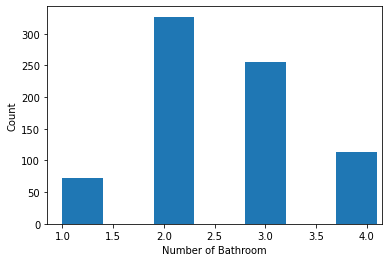

In [39]:
plt.hist(df6.Bathroom, width = 0.4)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

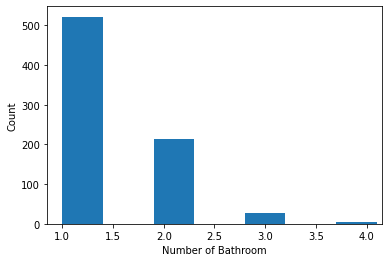

In [40]:
plt.hist(df6.Parking, width = 0.4)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

In [41]:
df6[df6.BHK < (df6.Parking)]

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
22,430.556,1,1.0,Rohini Sector 18 carpet area 40 sqm status Rea...,2.0,5300000,6154.0
123,1350.000,2,2.0,Lajpat Nagar 2,4.0,12500000,9259.0
278,900.000,2,2.0,"Kailash Colony, Greater Kailash",3.0,20000000,11111.0
328,1053.000,3,2.0,other,4.0,7000000,41304.0
373,387.000,1,2.0,"Guru Angad Nagar West, Laxmi Nagar",2.0,1700000,32000.0
425,900.000,2,2.0,Patel Nagar West,3.0,7400000,23840.0
463,600.000,1,2.0,"E2 Vasant Kunj, Vasant Kunj",2.0,7000000,20833.0
472,1100.000,2,2.0,Vasant Kunj,3.0,16500000,21818.0
571,1500.000,3,3.0,Safdarjung Enclave,4.0,37500000,25000.0
685,1400.000,2,3.0,"Common Wealth Games Village, Commonwealth Game...",3.0,28600000,20967.0


In [42]:
df6.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,6667.0


In [43]:
df7 = df6.drop(['Per_Sqft'],axis = 'columns')

In [44]:
df7

,Area,BHK,Bathroom,Locality,Parking,Price
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000
...,...,...,...,...,...,...
1252,1800.0,3,3.0,other,1.0,26000000
1253,1200.0,3,3.0,Chittaranjan Park,1.0,16500000
1255,1050.0,3,2.0,Chittaranjan Park,3.0,12500000
1257,990.0,2,2.0,Chittaranjan Park Block A,1.0,11500000


In [45]:
df7['BHK'] = df7['BHK'].astype(float)
df7['Price'] = df7['Price'].astype(float)

In [46]:
df7.dtypes

Area        float64
BHK         float64
Bathroom    float64
Locality     object
Parking     float64
Price       float64
dtype: object

In [47]:
df7.to_csv('df7.csv')

In [48]:
dummies = pd.get_dummies(df7.Locality,dtype=float)

In [49]:
dummies

,"Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Ahinsha Vatika, Ram Nagar, Shahdara",Alaknanda,"Amar Colony, Lajpat Nagar","Anekant Apartment, Vasundhara Enclave","Anupam Enclave, Saket","Apna Apartments, Savitri Nagar Village, Sheikh Sarai","Archana Apartment, Paschim Vihar",...,Vasant Kunj Sector A,Vasant Kunj Sector B,Vasant Kunj Sector C,Vasant Kunj Sector D,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Vihar, Shahdara",other
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis = 'columns')
df8

,Area,BHK,Bathroom,Locality,Parking,Price,"Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Ahinsha Vatika, Ram Nagar, Shahdara",...,Vasant Kunj,Vasant Kunj Sector A,Vasant Kunj Sector B,Vasant Kunj Sector C,Vasant Kunj Sector D,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Vihar, Shahdara"
1,750.0,2.0,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,950.0,2.0,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,600.0,2.0,2.0,Rohini Sector 24,1.0,4200000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,650.0,2.0,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1300.0,4.0,3.0,Rohini Sector 24,1.0,15500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3.0,3.0,other,1.0,26000000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1253,1200.0,3.0,3.0,Chittaranjan Park,1.0,16500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,1050.0,3.0,2.0,Chittaranjan Park,3.0,12500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,990.0,2.0,2.0,Chittaranjan Park Block A,1.0,11500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df9 = df8.drop('Locality',axis = 'columns')
df9

,Area,BHK,Bathroom,Parking,Price,"Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Ahinsha Vatika, Ram Nagar, Shahdara",Alaknanda,...,Vasant Kunj,Vasant Kunj Sector A,Vasant Kunj Sector B,Vasant Kunj Sector C,Vasant Kunj Sector D,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Vihar, Shahdara"
1,750.0,2.0,2.0,1.0,5000000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,950.0,2.0,2.0,1.0,15500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,600.0,2.0,2.0,1.0,4200000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,650.0,2.0,2.0,1.0,6200000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1300.0,4.0,3.0,1.0,15500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3.0,3.0,1.0,26000000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1253,1200.0,3.0,3.0,1.0,16500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,1050.0,3.0,2.0,3.0,12500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,990.0,2.0,2.0,1.0,11500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
x= df9.drop('Price',axis = 'columns')

In [53]:
y = df9.Price

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state =10)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
x_train = x_train.fillna(x_train.mean())
y_train= y_train.fillna(y_train.mean())
x_test= x_test.fillna(x_train.mean())
y_test = y_test.fillna(y_train.mean())
x = x.fillna(x.mean())
y = y.fillna(y.mean())

In [59]:
model.fit(x_train,y_train)

LinearRegression()

In [60]:
model.score(x_test,y_test)

-9515116991584988.0

In [61]:
def predict_price(location,sqft,bath,bhk,park):
    loc_index = np.where(x.columns==location)[0][0]
    
    X= np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    X[3] = park
    if loc_index >= 0:
        X[loc_index] =1
        
    return model.predict([X])[0]


In [62]:
predict_price('Rohini Sector 24',1300,3,4,1)

20048385.166470636

In [63]:
predict_price('Chittaranjan Park',1700,5,4,2)

39681075.948978096